In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "../log/alex"
dataset = "covid"
index = "alex"
time = "read"
suites = ["22", "21"]

data_dict = {}
data_dict_depth = {}

for suite in suites:
    if suite == "21":
        file_path = os.path.join(base_dir, dataset, suite, f"0.5/{index}_{time}_key_cmp_distribution.log")
    else:
        file_path = os.path.join(base_dir, dataset, suite, f"0.5/{index}_{time}_key_cmp_distribution.log")
    data = pd.read_csv(file_path)
    data_dict[suite] = data

for suite in suites:
    if suite == "21":
        file_path = os.path.join(base_dir, dataset, suite, f"0.5/{index}_insert_depth_distribution.log")
    else:
        file_path = os.path.join(base_dir, dataset, suite, f"0.5/{index}_insert_depth_distribution.log")
    data = pd.read_csv(file_path)
    data_dict_depth[suite] = data

print("load data sucessfully")

load data sucessfully


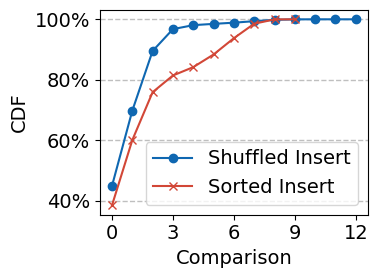

In [28]:
plt.rcParams.update({'font.size': 14})
colors = {'21': '#d24737', '22': '#0F67B1', 'ideal': '#72923a'}
labels = {'21': 'Sorted', '22': 'Shuffled'}
markers = {'21': 'x', '22': 'o'}

fig, ax = plt.subplots(figsize=(4, 3))

# cmp distribution
for suite in suites:
    data = data_dict[suite].copy()
    key_count = data['count'].sum()
    data['count'] = data['count'].cumsum() / key_count
    ax.plot(data['cmp'], data['count'], label=f"{labels[suite]} Insert".title(), color=colors[suite], marker=markers[suite])

ax.set_xlabel('Comparison')
ax.set_ylabel('CDF')
ax.set_xticks(range(0,13,3))
yticks = [0.4, 0.6, 0.8, 1]
yticklabels = ['40%', '60%', '80%', '100%']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('./fig/alex_cmp_cdf.pdf', bbox_inches='tight', transparent=True)

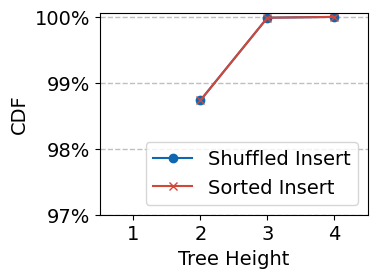

In [32]:
plt.rcParams.update({'font.size': 14})
colors = {'21': '#d24737', '22': '#0F67B1', 'ideal': '#72923a'}
labels = {'21': 'Sorted', '22': 'Shuffled'}
markers = {'21': 'x', '22': 'o'}

fig, ax = plt.subplots(figsize=(4, 3))

# depth distribution
lines = {}
for suite in suites:
    data = data_dict_depth[suite][1:].copy()
    key_count = data['count'].sum()
    data['count'] = data['count'].cumsum() / key_count
    line, = ax.plot(data['depth'], data['count'], label=f"{labels[suite]} Insert".title(), color=colors[suite], marker=markers[suite])
    lines[suite] = line

ax.set_xlabel('Tree Height')
ax.set_ylabel('CDF')
ax.set_xticks(range(1,5))
ax.set_xlim(left=0.5,right=4.5)
yticks = [0.97, 0.98, 0.99, 1]
yticklabels = ['97%','98%', '99%', '100%']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
fig.savefig('./fig/alex_depth_cdf.pdf', bbox_inches='tight', transparent=True)